In [31]:
# Bibliotecas 
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt  
from matplotlib.ticker import StrMethodFormatter




# Configurações
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [32]:
# Extraindo os dados e dando e visualizando as 5 primeiras linhas 
df = pd.read_csv("../data/Telco-Customer-Churn.csv")

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [33]:
# Informações gerais
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   str    
 1   gender            7043 non-null   str    
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   str    
 4   Dependents        7043 non-null   str    
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   str    
 7   MultipleLines     7043 non-null   str    
 8   InternetService   7043 non-null   str    
 9   OnlineSecurity    7043 non-null   str    
 10  OnlineBackup      7043 non-null   str    
 11  DeviceProtection  7043 non-null   str    
 12  TechSupport       7043 non-null   str    
 13  StreamingTV       7043 non-null   str    
 14  StreamingMovies   7043 non-null   str    
 15  Contract          7043 non-null   str    
 16  PaperlessBilling  7043 non-null   str    
 17  Paymen

In [34]:
print(f"O dataset possui {df.shape[0]} linhas e {df.shape[1]} colunas")

O dataset possui 7043 linhas e 21 colunas


In [35]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [36]:
df["gender"].unique()

<StringArray>
['Female', 'Male']
Length: 2, dtype: str

In [37]:
df["SeniorCitizen"].unique()


array([0, 1])

In [38]:
df["Partner"].unique()

<StringArray>
['Yes', 'No']
Length: 2, dtype: str

In [39]:
df["Dependents"].unique()

<StringArray>
['No', 'Yes']
Length: 2, dtype: str

In [40]:
df["tenure"].unique()

array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26,  0, 39])

In [41]:
df["PhoneService"].unique()

<StringArray>
['No', 'Yes']
Length: 2, dtype: str

In [42]:
df["MultipleLines"].unique()

<StringArray>
['No phone service', 'No', 'Yes']
Length: 3, dtype: str

In [43]:
df["InternetService"].unique()

<StringArray>
['DSL', 'Fiber optic', 'No']
Length: 3, dtype: str

In [44]:
df["OnlineSecurity"].unique()

<StringArray>
['No', 'Yes', 'No internet service']
Length: 3, dtype: str

In [45]:
df["OnlineBackup"].unique()

<StringArray>
['Yes', 'No', 'No internet service']
Length: 3, dtype: str

In [46]:
df["DeviceProtection"].unique()

<StringArray>
['No', 'Yes', 'No internet service']
Length: 3, dtype: str

In [47]:
df["TechSupport"].unique()

<StringArray>
['No', 'Yes', 'No internet service']
Length: 3, dtype: str

In [48]:
df["StreamingTV"].unique()

<StringArray>
['No', 'Yes', 'No internet service']
Length: 3, dtype: str

In [49]:
df["StreamingMovies"].unique()

<StringArray>
['No', 'Yes', 'No internet service']
Length: 3, dtype: str

In [50]:
df["Contract"].unique()

<StringArray>
['Month-to-month', 'One year', 'Two year']
Length: 3, dtype: str

In [51]:
df["PaperlessBilling"].unique()

<StringArray>
['Yes', 'No']
Length: 2, dtype: str

In [52]:
df["PaymentMethod"].unique()

<StringArray>
[         'Electronic check',              'Mailed check',
 'Bank transfer (automatic)',   'Credit card (automatic)']
Length: 4, dtype: str

In [53]:
df["MonthlyCharges"].unique()

array([29.85, 56.95, 53.85, ..., 63.1 , 44.2 , 78.7 ], shape=(1585,))

In [54]:
df["TotalCharges"].unique()

<StringArray>
[  '29.85',  '1889.5',  '108.15', '1840.75',  '151.65',   '820.5',  '1949.4',
   '301.9', '3046.05', '3487.95',
 ...
 '2625.25', '6886.25',  '1495.1',   '743.3',  '1419.4',  '1990.5',  '7362.9',
  '346.45',   '306.6',  '6844.5']
Length: 6531, dtype: str

In [55]:
df["Churn"].unique()

<StringArray>
['No', 'Yes']
Length: 2, dtype: str

In [56]:
# Questão 1. Qual a proporção de clientes que deram churn em relação ao total de clientes ?

df["Churn"].value_counts(normalize=True) * 100 

Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64

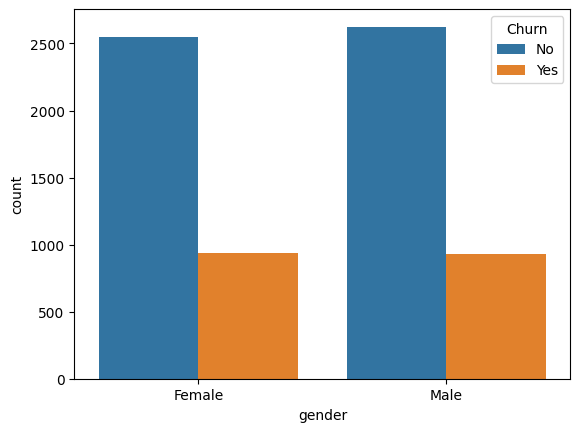

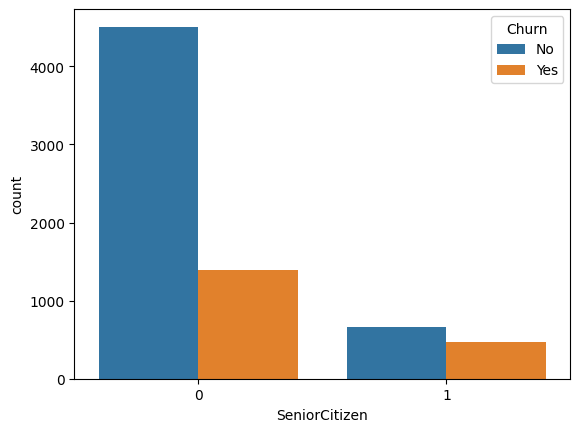

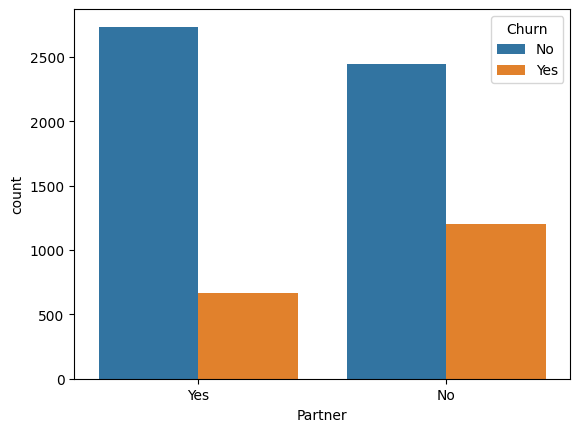

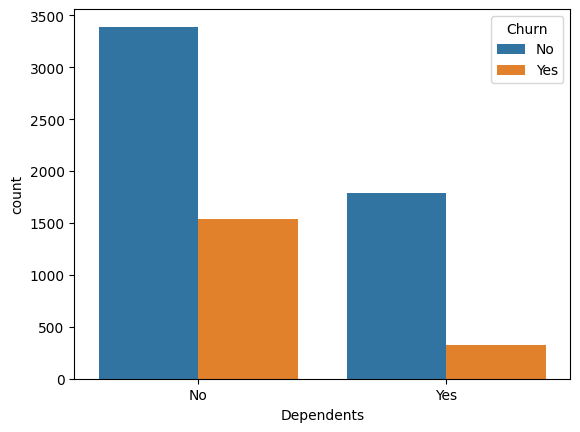

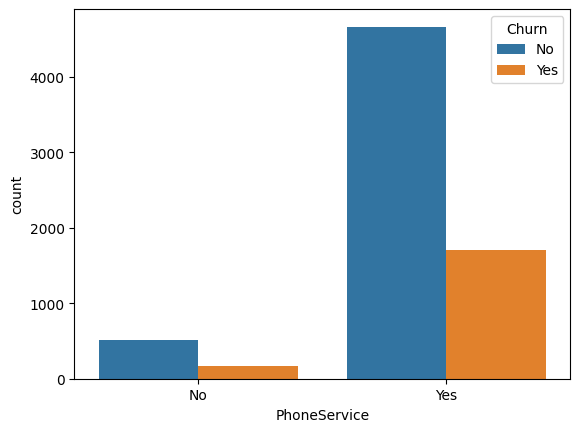

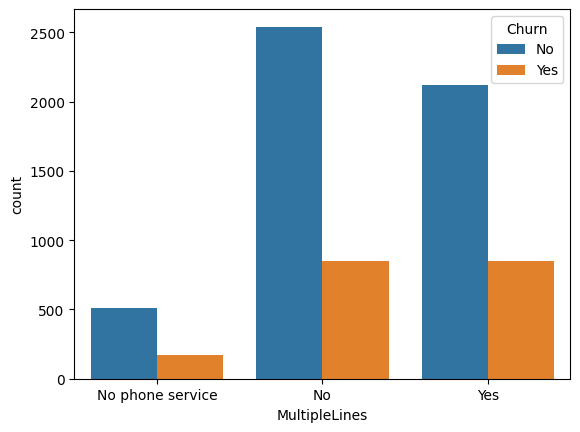

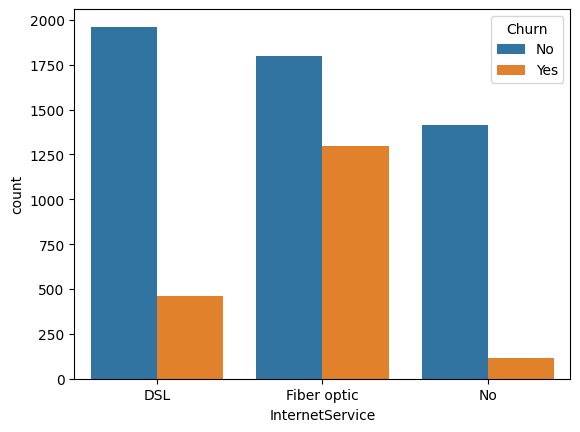

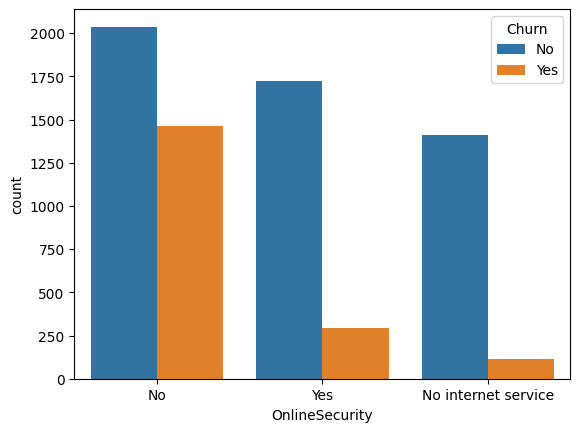

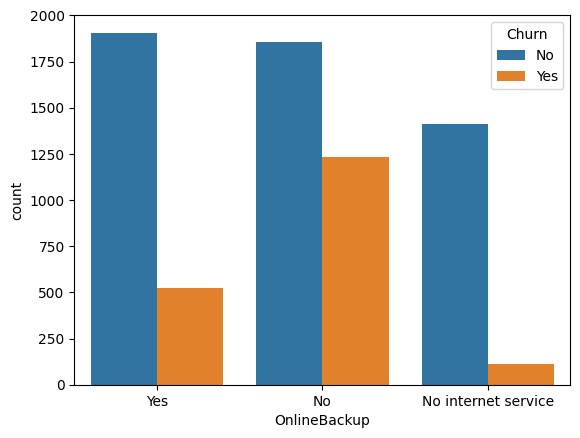

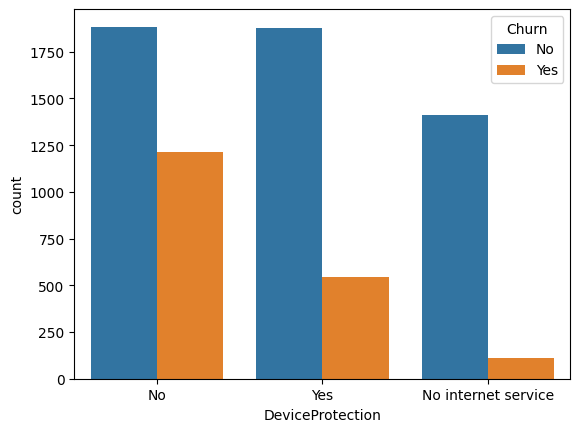

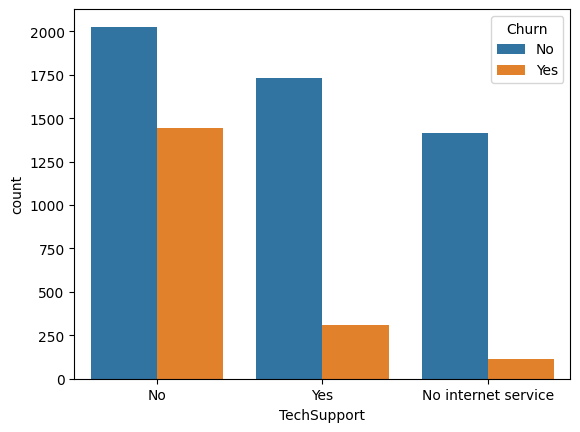

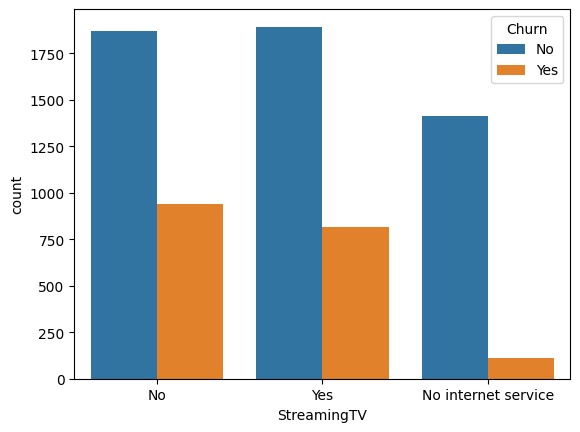

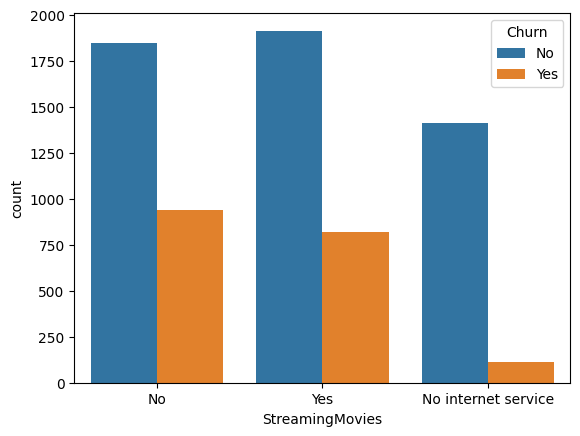

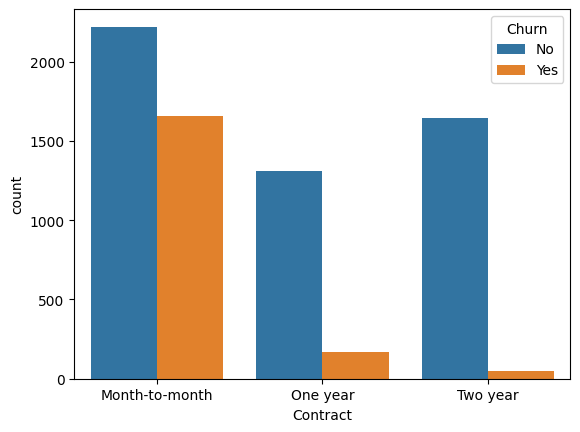

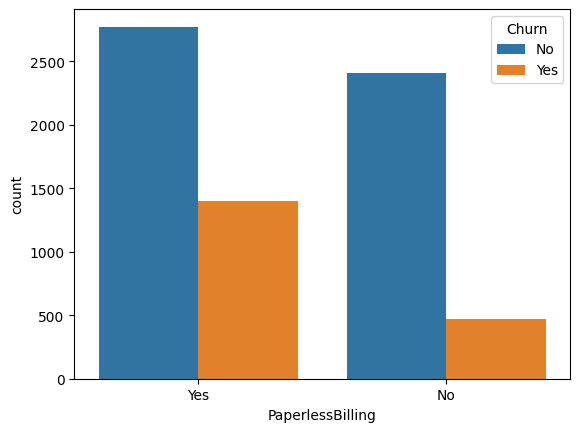

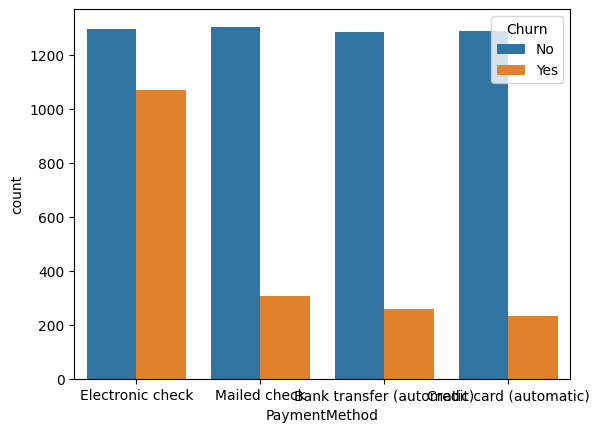

In [60]:
for i, predictor in enumerate(df.drop(columns=['customerID','Churn', 'TotalCharges', 'MonthlyCharges', 'tenure'])):
    plt.figure(i)
    sns.countplot(data=df, x=predictor, hue='Churn')

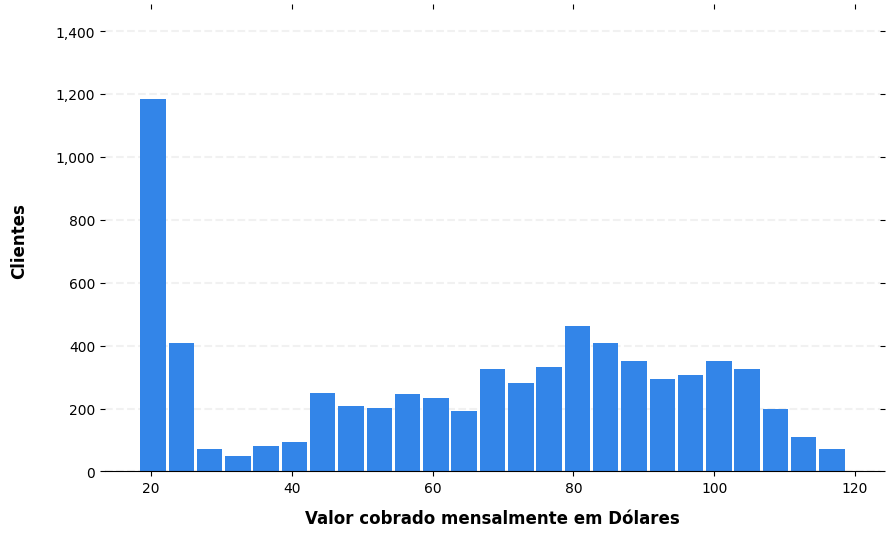

In [58]:
# Grafico de histograma
ax = df.hist(column="MonthlyCharges", 
             bins=25, 
             grid=False, 
             figsize=(10, 6), 
             color='#3385e8', 
             zorder=2, 
             rwidth=0.9)

ax = ax[0]
for x in ax:

    x.spines["right"].set_visible(False)
    x.spines["top"].set_visible(False)
    x.spines["left"].set_visible(False)

    x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color="#DEDEDE", zorder=1)

    x.set_title("")

    x.set_xlabel("Valor cobrado mensalmente em Dólares", labelpad=10, weight='bold', size=12)

    x.set_ylabel("Clientes", labelpad=20, weight='bold', size=12)

    x.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))